In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sympy as sp
from utils.function_utils import gen_random_example, XS
from gd_fit import fit_best_function
import tensorflow as tf
from concurrent.futures import ThreadPoolExecutor, as_completed

print(tf.config.list_physical_devices('XPU'))

2025-12-07 21:55:22.989018: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-07 21:55:22.990606: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-07 21:55:23.010906: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-07 21:55:23.010936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-07 21:55:23.011685: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

[PhysicalDevice(name='/physical_device:XPU:0', device_type='XPU')]


2025-12-07 21:55:23.977514: W external/local_tsl/tsl/lib/monitoring/collection_registry.cc:81] Trying to register 2 metrics with the same name: /tensorflow/core/bfc_allocator_delay. The old value will be erased in order to register a new one. Please check if you link the metric more than once, or if the name is already used by other metrics.
2025-12-07 21:55:23.977628: W external/local_tsl/tsl/lib/monitoring/collection_registry.cc:81] Trying to register 2 metrics with the same name: /xla/service/gpu/compiled_programs_count. The old value will be erased in order to register a new one. Please check if you link the metric more than once, or if the name is already used by other metrics.
2025-12-07 21:55:23.978369: W external/local_tsl/tsl/lib/monitoring/collection_registry.cc:81] Trying to register 2 metrics with the same name: /jax/pjrt/pjrt_executable_executions. The old value will be erased in order to register a new one. Please check if you link the metric more than once, or if the nam

In [ ]:
import numpy as np
from concurrent.futures import ProcessPoolExecutor, as_completed
import sympy as sp

results = []
num_tasks = 100

# Seed sequence based on the process index
def generate_seed(task_idx):
    return np.random.SeedSequence(12345 + task_idx)  # Use task index to modify the seed

def worker(task_idx, seed):
    # Local RNG per workers
    RNG = np.random.default_rng(seed)

    # Generate function
    f_expr = gen_random_example(RNG, complexity=1)

    # Sample it
    XS_syms = sp.symbols('x')
    f_sampled = np.array([f_expr.subs(XS_syms, xi) for xi in XS], dtype=np.float64)

    # Fit
    best_expr, best_params, best_loss = fit_best_function(f_sampled)
    return f_expr, best_expr, best_loss

# Create the pool of workers with different seeds
with ProcessPoolExecutor(max_workers=8) as executor:
    futures = [
        executor.submit(worker, i, generate_seed(i))  # Pass task index and generated seed
        for i in range(num_tasks)
    ]
    
    for future in as_completed(futures):
        f_expr, best_expr, best_loss = future.result()
        print("Sampled function:", f_expr)
        print("Best expression:", best_expr)
        print("Best loss:", best_loss)
        results.append([f_expr, best_expr, best_loss])

print("DONE")

Process SpawnProcess-6:
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.5/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
    ~~~~~~~~^^
  File "/opt/homebrew/Cellar/python@3.13/3.13.5/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/python@3.13/3.13.5/Frameworks/Python.framework/Versions/3.13/lib/python3.13/concurrent/futures/process.py", line 242, in _process_worker
    call_item = call_queue.get(block=True)
  File "/opt/homebrew/Cellar/python@3.13/3.13.5/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py", line 120, in get
    return _ForkingPickler.loads(res)
           ~~~~~~~~~~~~~~~~~~~~~^^^^^
AttributeError: Can't get attribute 'worker' on <module '__main__' (<class 

BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

Refinement round 3: best loss so far = 362.411426
Best found: 2.68641*x - 10.3574
Complexity 1, 10 templates
Fitting template: a1*exp(a0*x + b0) + b1


In [ ]:
def worker(seed):
    # Local RNG per worker
    RNG = np.random.default_rng(seed)

    # Generate function
    f_expr = gen_random_example(RNG, complexity=1)

    # Sample it
    XS_syms = sp.symbols('x')
    f_sampled = np.array([f_expr.subs(XS_syms, xi) for xi in XS], dtype=np.float64)

    # Fit
    best_expr, best_params, best_loss = fit_best_function(f_sampled)
    return f_expr, best_expr, best_loss


Complexity 0, 1 templates
Fitting template: a0*x + b0
Complexity 0, 1 templates
Fitting template: a0*x + b0
Complexity 0, 1 templatesComplexity 0, 1 templates
Fitting template: a0*x + b0

Fitting template: a0*x + b0
Complexity 0, 1 templates
Fitting template: a0*x + b0
Complexity 0, 1 templates
Fitting template: a0*x + b0
Complexity 0, 1 templates
Fitting template: a0*x + b0
Complexity 0, 1 templates
Fitting template: a0*x + b0
Refinement round 1: best loss so far = 4121574.901348
Refinement round 1: best loss so far = 5814498.405880
Refinement round 1: best loss so far = 4199.177608
Refinement round 1: best loss so far = 15741.956206
Refinement round 1: best loss so far = 24415.996571
Refinement round 1: best loss so far = 13028.409687
Refinement round 1: best loss so far = 4439775.072987
Refinement round 1: best loss so far = 1818471.940737
Refinement round 2: best loss so far = 4121506.472158
Refinement round 2: best loss so far = 5063735.898746
Refinement round 2: best loss so far 

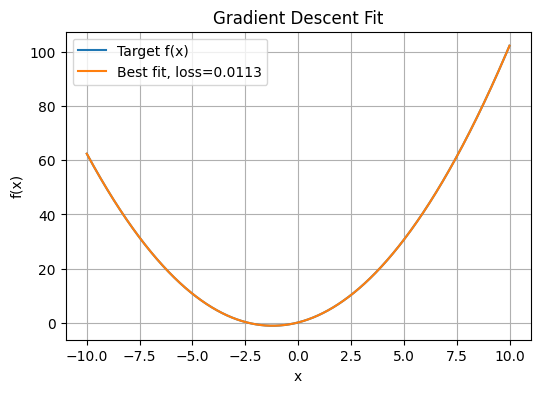

Sampled function: -0.302063509839859*(-3.9851935018145*x - 0.115183573679795)*(0.683967672002661*x + 1.63809752846065) + 0.0177434543807167
Best expression: 1.44203*(0.448722*x + 1.20145)*(1.27238*x - 0.322878) + 0.634871
Best loss: 0.0113499109841497
Complexity 0, 1 templates
Fitting template: a0*x + b0
Best found: 0.0170972*(0.195587*x + 0.483736)/(0.75349*x + 2.1092) + 0.569209
Fitting template: a2*(a0*x + b0)**(a1*x + b1) + b2
Refinement round 2: best loss so far = 4338.345237
Refinement round 4: best loss so far = 1261354.093277
Best overall loss: 0.0005


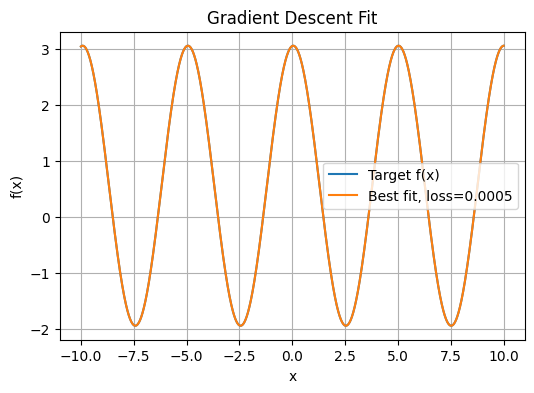

Sampled function: 2.50471644390007*cos(1.26121228708268*x - 0.0573459824393441) + 0.558457018849424
Best expression: 2.50474*cos(1.26124*x - 0.0573258) + 0.558471
Best loss: 0.00045686857876514023
Complexity 0, 1 templates
Fitting template: a0*x + b0
Best found: 0.00179315*(0.299708*x + 1.25927)/(0.637928*x - 2.08765) - 1.34799
Fitting template: a2*(a0*x + b0)**(a1*x + b1) + b2
Best overall loss: 0.0067


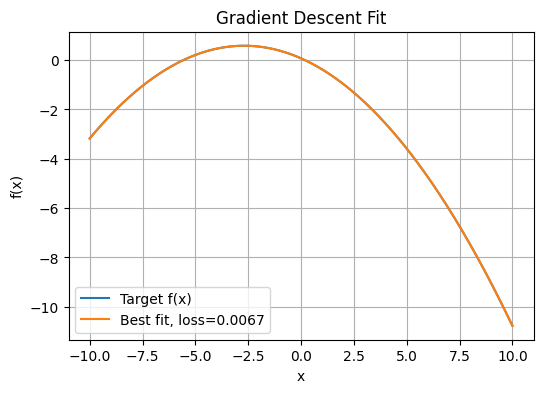

Sampled function: 2.87992859683461*(-0.238737524115642*x - 0.686902484838045)*(0.102453877967318*x + 0.257202468909011) + 0.578712052927862
Best expression: 0.270972*(-0.380573*x - 3.22676)*(0.683351*x - 2.11503) - 1.7783
Best loss: 0.006679457915374812
Complexity 0, 1 templates
Fitting template: a0*x + b0
Refinement round 3: best loss so far = 4122353.863292
Best found: -0.554755 + 2.24754*(1.44212*x + 0.720797)/(0.941954*x + 0.464259)
Fitting template: a2*(a0*x + b0)**(a1*x + b1) + b2
Best overall loss: 0.0024


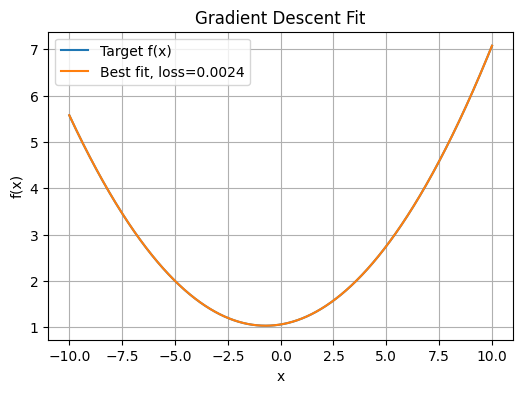

Sampled function: -0.127441068670549*(-0.651863427196313*x - 0.573642120635269)*(0.633917121070844*x + 0.345591413864221) + 1.03600990444272
Best expression: 0.110498*(0.383971*x + 0.391814)*(1.24133*x + 0.502068) + 1.04004
Best loss: 0.002372729320351305
Complexity 0, 1 templates
Fitting template: a0*x + b0
Refinement round 1: best loss so far = 90129.937786
Best found: 0.291344 + 0.53383*(0.995027*x - 0.697284)/(0.660423*x - 0.459615)
Fitting template: a2*(a0*x + b0)**(a1*x + b1) + b2
Refinement round 1: best loss so far = 55752625883312897217392651167724202641850368.000000
Refinement round 1: best loss so far = 463596101.936497
Refinement round 3: best loss so far = 4338.345237
Best found: 6.55348 + 3.13758*(2.04958*x + 0.899925)/(1.47272*x + 0.644085)
Fitting template: a2*(a0*x + b0)**(a1*x + b1) + b2
Best overall loss: 0.0278


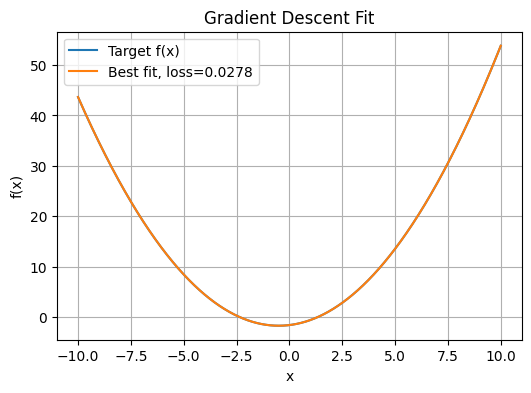

Sampled function: -0.251172369590018*(1.55952902896806 - 2.7697735211954*x)*(0.723060873544197*x + 1.13844691227314) - 1.115506040161
Best expression: 0.819078*(0.454209*x + 0.337278)*(1.35228*x + 0.363166) - 1.66272
Best loss: 0.027776025277724763
Complexity 0, 1 templates
Fitting template: a0*x + b0
Refinement round 2: best loss so far = 61603.237242
Refinement round 1: best loss so far = 163132684.310282
Refinement round 2: best loss so far = 55752625883312897217392651167724202641850368.000000
Refinement round 1: best loss so far = 563588678.866347
Refinement round 3: best loss so far = 58253.949931
Refinement round 4: best loss so far = 4122353.863292
Refinement round 2: best loss so far = 160434400.934521
Refinement round 3: best loss so far = 55752625883312897217392651167724202641850368.000000
Refinement round 2: best loss so far = 563464977.509201
Refinement round 4: best loss so far = 58253.949931
Refinement round 1: best loss so far = 518627.925577
Refinement round 2: best los

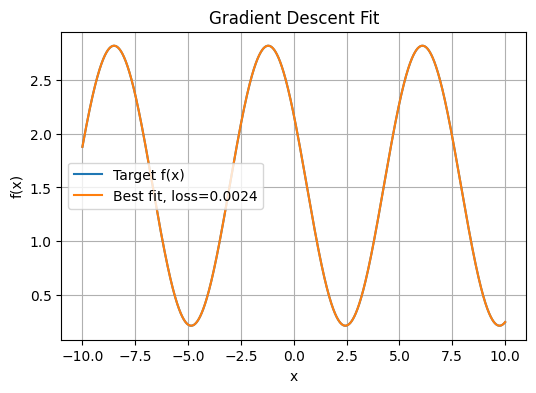

Sampled function: 1.30111569692837*cos(0.861219351801604*x + 1.0397616015005) + 1.51581490400262
Best expression: 1.30114*sin(0.861282*x + 2.61124) + 1.51593
Best loss: 0.002365007464090071
Complexity 0, 1 templates
Fitting template: a0*x + b0
Best found: 0.35632*x - 6.89556
Complexity 1, 10 templates
Fitting template: a1*exp(a0*x + b0) + b1
Refinement round 4: best loss so far = 415334.554305
Best found: 1.01133*x - 5.54576
Complexity 1, 10 templates
Fitting template: a1*exp(a0*x + b0) + b1
Refinement round 1: best loss so far = 43319.920953
Refinement round 2: best loss so far = 4121658.934492
Refinement round 1: best loss so far = 5.292105
Refinement round 1: best loss so far = 55751668931631459312466695153597665731674112.000000
Refinement round 4: best loss so far = 7898.370959
Refinement round 1: best loss so far = 82239835.256313
Refinement round 2: best loss so far = 5.150996
Refinement round 2: best loss so far = 9533.256357
Refinement round 1: best loss so far = 563878016.6227

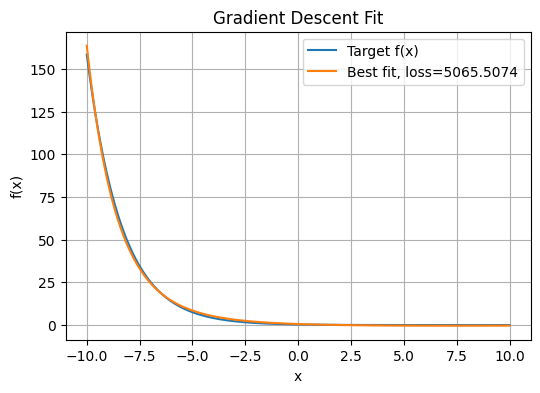

Sampled function: -0.0237001585081582 + 0.357330361727728*exp(-0.609455089891335*x)
Best expression: 1.7311*(0.0157825*x + 0.755455)**(0.894505*x + 0.0958184) - 1.09261
Best loss: 5065.507361834975
Complexity 0, 1 templates
Fitting template: a0*x + b0
Refinement round 4: best loss so far = 5.149244
Refinement round 2: best loss so far = 563772517.610468
Refinement round 3: best loss so far = 55751668931631459312466695153597665731674112.000000
Best found: -0.0198383*x - 1.37323
Complexity 1, 10 templates
Fitting template: a1*exp(a0*x + b0) + b1
Refinement round 3: best loss so far = 77235698.176962
Refinement round 2: best loss so far = 814833.510127
Refinement round 4: best loss so far = 8042.846140
Refinement round 4: best loss so far = 4121658.934492
Refinement round 3: best loss so far = 563691523.450289
Refinement round 1: best loss so far = 3265.096382
Refinement round 4: best loss so far = 55751668931631459312466695153597665731674112.000000
Refinement round 4: best loss so far = 

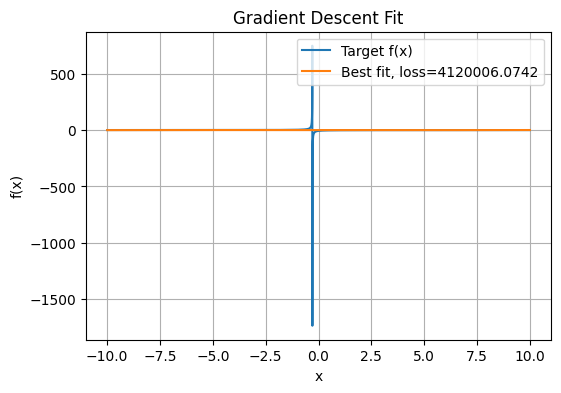

Sampled function: 0.500443745159276 - 9.40261567301983*(0.496343227766148*x - 0.627962207542293)/(-3.46265863643665*x - 1.00854490076049)
Best expression: 1.43352 - 0.759694*cos(0.378786*x - 0.974107)
Best loss: 4120006.0742313904
Complexity 0, 1 templates
Fitting template: a0*x + b0
Refinement round 1: best loss so far = 43.413581
Best found: -0.193155 + 124.775*exp(-0.000463484*x)
Fitting template: a1*log(a0*x + b0) + b1
Fitting template: a1*sin(a0*x + b0) + b1
Refinement round 4: best loss so far = 714426.811986
Refinement round 4: best loss so far = 3259.792199
Best found: -0.00288779*exp(0.58001*x) - 4.43533
Fitting template: a1*log(a0*x + b0) + b1
Refinement round 1: best loss so far = nan
Refinement round 2: best loss so far = 0.329111
Best found: 0.714357 - 0.0018368*x
Complexity 1, 10 templates
Fitting template: a1*exp(a0*x + b0) + b1
Refinement round 1: best loss so far = 464.855320
Best found: 3.12677*exp(0.109833*x) - 7.56698
Fitting template: a1*log(a0*x + b0) + b1
Refinem

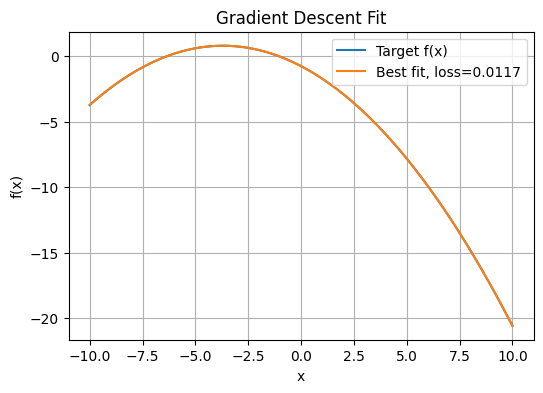

Complexity 0, 1 templates
Fitting template: a0*x + b0
Refinement round 1: best loss so far = 487.444603
Refinement round 2: best loss so far = 3257.991201
Best found: 0.979178*(0.788543*x - 0.0611469)/(0.903527*x - 0.0788384) - 0.548886
Fitting template: a2*(a0*x + b0)**(a1*x + b1) + b2
Refinement round 2: best loss so far = 70.933138
Best found: 5.54317 - 0.379711*x
Fitting template: a2*(a0*x + b0)*(a1*x + b1) + b2
Refinement round 1: best loss so far = nan
Refinement round 1: best loss so far = 17489667.295180
Best found: 4.19447 + 6.96415*(5.99052*x - 0.528151)/(0.439299*x - 0.0386229)
Fitting template: a2*(a0*x + b0)**(a1*x + b1) + b2
Refinement round 2: best loss so far = 463.675835
Refinement round 1: best loss so far = 95262030.043332
Refinement round 2: best loss so far = 16554069.350457
Refinement round 3: best loss so far = 3257.913531
Refinement round 3: best loss so far = 70.763021
Refinement round 1: best loss so far = 101005870.103240
Refinement round 2: best loss so far 

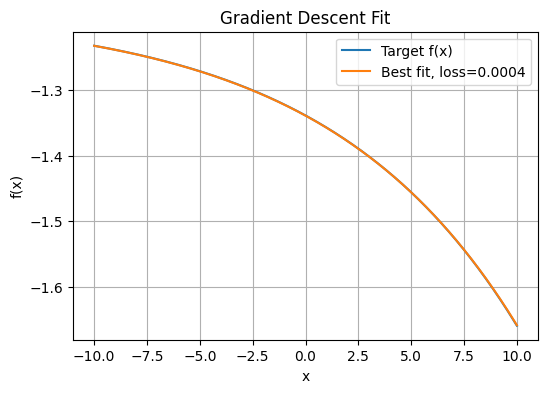

Complexity 0, 1 templates
Fitting template: a0*x + b0
Refinement round 4: best loss so far = nan
Best found: -0.0216747*(0.0435549*x + 0.00599158)*(0.550851*x - 0.0519466) + 0.288983
Fitting template: a2*(a0*x + b0)/(a1*x + b1) + b2
Refinement round 1: best loss so far = 8176752.088669
Refinement round 4: best loss so far = 60557696.238941
Refinement round 1: best loss so far = 4308.980058
Refinement round 4: best loss so far = 101005870.103240
Refinement round 3: best loss so far = 0.020353
Refinement round 2: best loss so far = 7933229.372318
Complexity 0, 1 templates
Fitting template: a0*x + b0
Refinement round 2: best loss so far = 4305.213351
Refinement round 3: best loss so far = 4305.213351
Refinement round 1: best loss so far = 3261.060968
Refinement round 3: best loss so far = 7822774.956947
Best found: 2.25244*(0.096696*x + 1.3242)**(0.619101*x + 0.614249) + 4.30094
Best overall loss: 0.6385


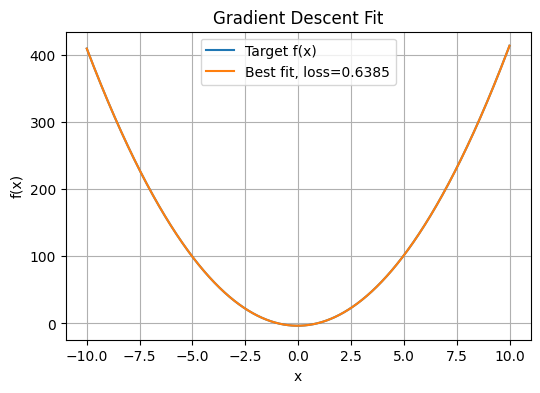

Complexity 0, 1 templates
Fitting template: a0*x + b0
Best found: 1.40019*(0.00383526*x - 0.0290979)*(1.26119*x - 0.773966) - 1.00346
Fitting template: a2*(a0*x + b0)/(a1*x + b1) + b2
Refinement round 4: best loss so far = 0.011022
Refinement round 1: best loss so far = 3266665620.271832
Refinement round 4: best loss so far = 4305.213351
Refinement round 1: best loss so far = 464.838505
Refinement round 2: best loss so far = 3249463612.689733
Refinement round 4: best loss so far = 7591200.504317
Best found: 1.18126 - 0.00247424*x
Complexity 1, 10 templates
Fitting template: a1*exp(a0*x + b0) + b1
Refinement round 1: best loss so far = 362.600136
Refinement round 2: best loss so far = 3259.880256
Refinement round 3: best loss so far = 3234248678.531061
Best found: 0.169948*(0.471817*x - 0.835096)*(2.14341*x - 0.997016) + 1.05429
Fitting template: a2*(a0*x + b0)/(a1*x + b1) + b2


KeyboardInterrupt: 

Refinement round 2: best loss so far = 362.411524
Best found: 6.14623*exp(0.323805*x) + 5.10205
Fitting template: a1*log(a0*x + b0) + b1
Fitting template: a1*sin(a0*x + b0) + b1


In [ ]:
results = []
num_tasks = 100

# Pre-generate seeds for reproducibility
seeds = np.random.SeedSequence(12346).spawn(num_tasks)

with ThreadPoolExecutor(max_workers=8) as executor:  # choose number of threads
    futures = [executor.submit(worker, int(s.generate_state(1)[0])) for s in seeds]

    for future in as_completed(futures):
        f_expr, best_expr, best_loss = future.result()
        print("Sampled function:", f_expr)
        print("Best expression:", best_expr)
        print("Best loss:", best_loss)
        results.append([f_expr, best_expr, best_loss])

print("DONE")

In [ ]:

# Generate a target function
RNG = np.random.default_rng(120)
f_expr = gen_random_example(RNG, complexity=1)
f_sampled = np.array([f_expr.subs(sp.symbols('x'), xi) for xi in XS], dtype=np.float64)
print('Sampled function: ', f_expr)

# Fit best function
best_expr, best_params, best_loss = fit_best_function(f_sampled)
print("Best expression:", best_expr)
print("Best parameters:", best_params)


Sampled function:  0.577103791257251 - 0.22480802082381*log(0.128127407140673*x + 1.28792526128925)
Complexity 0, 1 templates
Fitting template: a0*x + b0


KeyboardInterrupt: 

In [7]:
master_rng = np.random.default_rng(120)

In [8]:
rngs = [np.random.default_rng(master_rng.integers(0, 32)) for _ in range(10)]

In [9]:
for i in range(10):
# Generate a target function
    f_expr = gen_random_example(rngs[i], complexity=1)
    f_sampled = np.array([f_expr.subs(sp.symbols('x'), xi) for xi in XS], dtype=np.float64)
    print('Sampled function: ', f_expr)

    # Fit best function
    best_expr, best_params, best_loss = fit_best_function(f_sampled)
    print("Best expression:", best_expr)
    print("Best parameters:", best_params)


Sampled function:  -0.31590102771709*(-0.44151871545505*x - 0.423349109811582)/(0.465081338229672*x + 0.630041950729872) - 1.36309628972832
Complexity 0, 1 templates
Complexity 1, 10 templates
Fitting template: a1*exp(a0*x + b0) + b1


KeyboardInterrupt: 